# Image Processing
# Lab V - Edge Detection

## 1. Introduction

As discussed in the previous lab, in many applications, objects have to be separated from each other and from the background. Humans are naturally efficient at this task, since they can see where one object ends, and another one begins. Even though this process is automatic for us, in order to "explain" it to a computer, one needs to formalize the idea of an object "ending".

Objects are delimited in images by their edges. The simplest way to think of edges is to take the case of cartoons, where, in most cases, objects and characters are clearly delimited by an outline. Objects do not have contours in real life however, so it is required to define the edge of an object.

<b>Edges are sudden changes in the values of pixels.</b> These changes may be caused by the boundaries of an object, variations in scene lighting, or other factors.

Today's lab will focus on three methods of extracting edges from grayscale images. They compute the magnitude (strength) of the edges. In order to get a binary decision (edge / not an edge), these magnitude values should be thresholded.

## 2. The gradient method
The mathematics behind this method has been discussed during your lectures, so the explanation will target the implementation of this method. Long story short, the gradient method says that edges are sudden changes in pixel values, so this implies high values of the gradient in that point (gradients are just derivaties, but in multi-dimensional spaces).

The algorithm computes the horizontal and vertical gradients of each pixel in the image, where:
 - <b>the horizontal gradient is the difference between the current pixel and the one on the right</b>
 $$dx = I[i,j]-I[i,j+1]$$
 - <b>the vertical gradient is the difference between the current pixel and the one below</b>
 $$dy = I[i,j]-I[i+1,j]$$

Knowing the gradients, the edge strength is the magnitude of the gradient:
$$O[i,j] = \sqrt{dx^2+dy^2}$$

<img src="media/derivative.png"><center>Gradient computation</center>

There are some other alternate solutions for computing the horizontal and vertical gradients:
- subtract the pixels on the left and above, instead of right and below
- subtract the pixel below from the pixel above and the pixel on the right from the pixel on the left

<i>Computing the gradients is nothing more than filtering the image with some particular kernels! Think about it. How would you define the 3x3 kernels for the two gradients?</i>

## 3. The compass method

Unlike the gradient method, the compass method computes 4 absolute differences, between:
 - the left and right pixels
 - the top and bottom pixels
 - the top-left and bottom-right pixels
 - the top-right and bottom-left pixels
 
The edge strength is the biggest of the four differences.
<img src="media/compass.png"><center>The compass method</center>

## 4. Sobel operators
Noisy images will have noisy edges as well, since the values are altered. Some edges will be lost, and some new ones will appear. If the image were to be filtered with a average filter, the edges would be affected because of the blurring effect of this kind of filters.

To tackle this issue, Sobel filters are used, which both filter and detect edges. They do not blur the image when filtering, since they filter both sides of the edge separately.

To compute the edge, one must filter all pixels in the image with the four kernels (F1,F2,F3,F4). After that, the edge strength is the largest value resulted from the four filters. The kernels are presented in the figure below:
<img src="media/sobel.png"><center>The four kernels</center>

Based on the constant <b>C</b>, there are several kind of kernels:
 - if C=1 the kernels are called Prewitt kernels
 - if C=2 the kernels are called Sobel kernels
 - if C=$\sqrt{2}$ the kernels are called isotropic kernels

## Attention! Remember to scale the values of the grayscale image to be in the 0...255 interval
```python
img = io.imread(...)
img = color.rgb2gray(img)
img = img*255
```

### Exercise 1. Implement the gradient method on a grayscale image.

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fccad3847c0>)

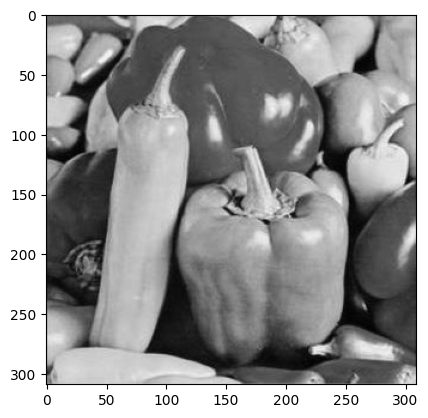

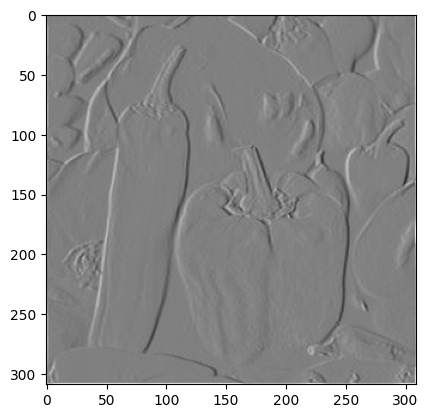

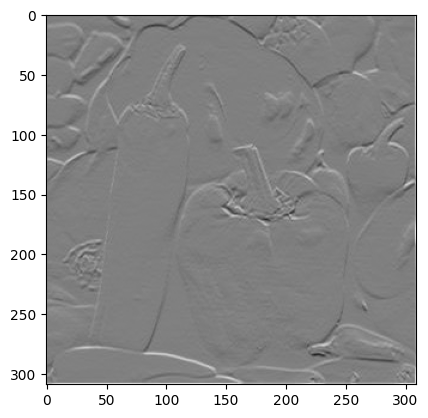

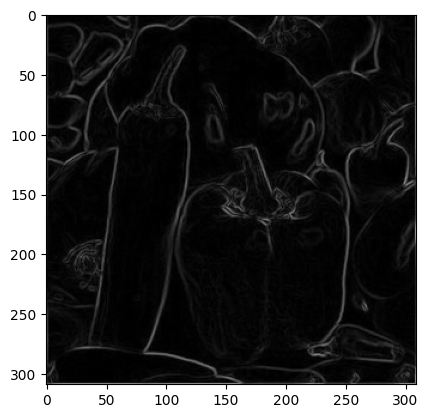

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import math

img = io.imread('peppers.png')
img = color.rgb2gray(img)
img = (img * 255).astype(int), plt.figure(), plt.imshow(img_d4, cmap = 'gray', vmin = 0, vmax = 255 * 1.44)

plt.figure(), plt.imshow(img, cmap = 'gray')

h, w = img.shape

mask_x = ([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
mask_y = ([[0, -1, 0], [0, 0, 0], [0, 1, 0]])

img_fx = img.copy()
img_fy = img.copy()
img_fgrad = img.copy()

w_size = 3
border = w_size // 2
for i in range(border, h - border):
    for j in range(border, w - border):
        V = img[i - border:i + border + 1, j - border:j + border + 1]
        V_x = V * mask_x
        V_y = V * mask_y
        img_fx[i, j] = np.sum(V_x)
        img_fy[i, j] = np.sum(V_y)
        img_fgrad[i, j] = math.sqrt(img_fx[i, j] ** 2 + img_fy[i, j] ** 2)
        
plt.figure(), plt.imshow(img_fx, cmap = 'gray', vmin = -255, vmax = 255) 
plt.figure(), plt.imshow(img_fy, cmap = 'gray', vmin = -255, vmax = 255)
plt.figure(), plt.imshow(img_fgrad, cmap = 'gray', vmin = 0, vmax = 255 * 1.44)

### Exercise 2. Implement the compass method on a grayscale image.
To get the maximum value you can use:
```python
m = np.max([D1,D2,D3,D4])
```

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7fccad4d6fe0>)

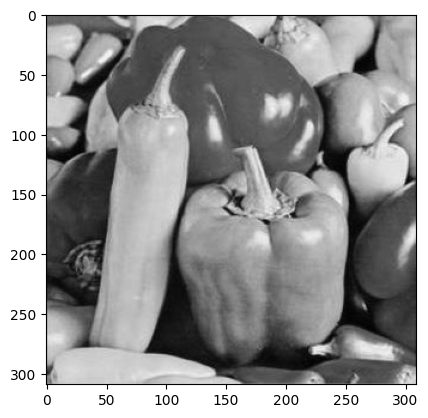

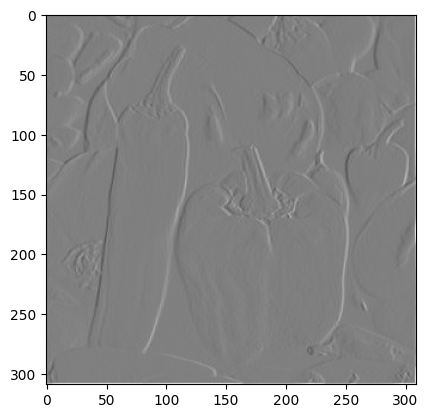

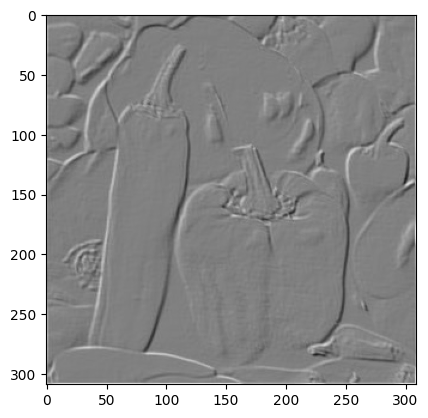

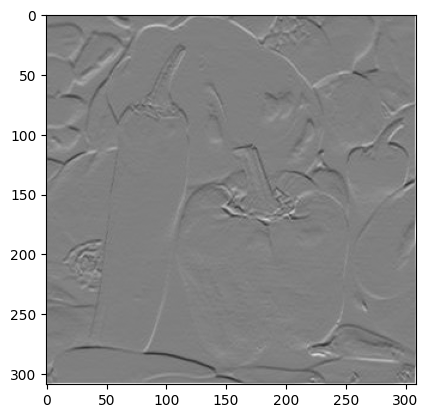

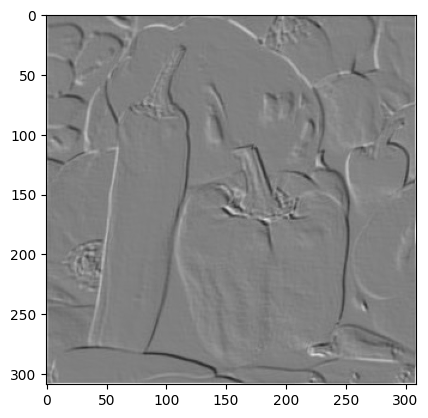

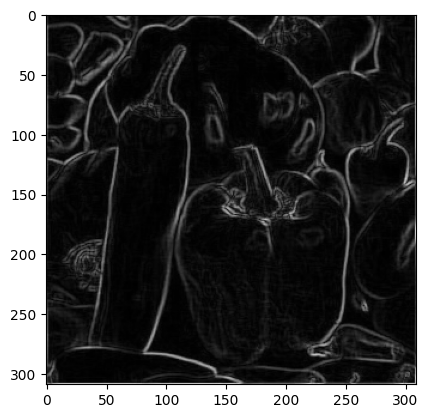

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

img = io.imread('peppers.png')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

plt.figure(), plt.imshow(img, cmap = 'gray')

h, w = img.shape

mask_d1 = [[0, 0, 0], [0, 1, -1], [0, 0, 0]]
mask_d2 = [[-1, 0, 0], [0, 0, 0], [0, 0, 1]]
mask_d3 = [[0, 1, 0], [0, 0, 0], [0, -1, 0]]
mask_d4 = [[0, 0, 1], [0, 0, 0], [-1, 0, 0]]

img_d1 = img.copy()
img_d2 = img.copy()
img_d3 = img.copy()
img_d4 = img.copy()
img_comp = img.copy()

w_size = 3
border = w_size // 2
for i in range(border, h - border):
    for j in range(border, w - border):
        V = img[i - border:i + border + 1, j - border:j + border + 1]
        V_d1 = V * mask_d1
        V_d2 = V * mask_d2
        V_d3 = V * mask_d3
        V_d4 = V * mask_d4
        
        img_d1[i, j] = np.sum(V_d1)
        img_d2[i, j] = np.sum(V_d2)
        img_d3[i, j] = np.sum(V_d3)
        img_d4[i, j] = np.sum(V_d4)
        img_comp[i, j] = np.max([abs(img_d1[i, j]), abs(img_d2[i, j]), abs(img_d3[i, j]), abs(img_d4[i, j])])
        
plt.figure(), plt.imshow(img_d1, cmap = 'gray', vmin = -255, vmax = 255) 
plt.figure(), plt.imshow(img_d2, cmap = 'gray', vmin = -255, vmax = 255)
plt.figure(), plt.imshow(img_d3, cmap = 'gray', vmin = -255, vmax = 255)
plt.figure(), plt.imshow(img_d4, cmap = 'gray', vmin = -255, vmax = 255)
plt.figure(), plt.imshow(img_comp, cmap = 'gray', vmin = 0, vmax = 255)

### Exercise 3. Implement the Sobel method on a grayscale image.
Try different values for C

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'sobel'))

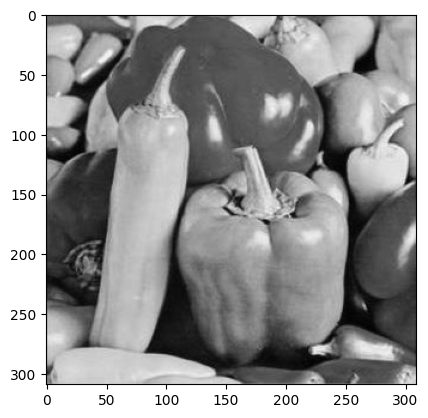

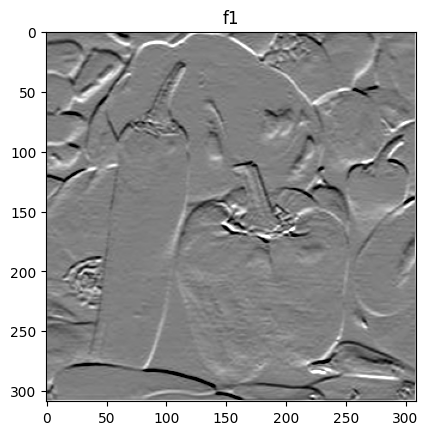

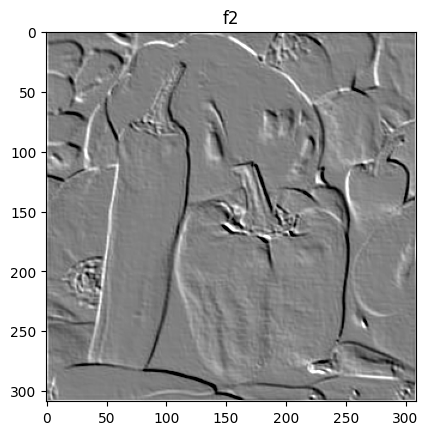

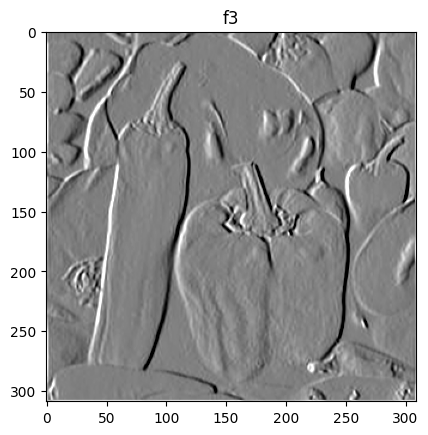

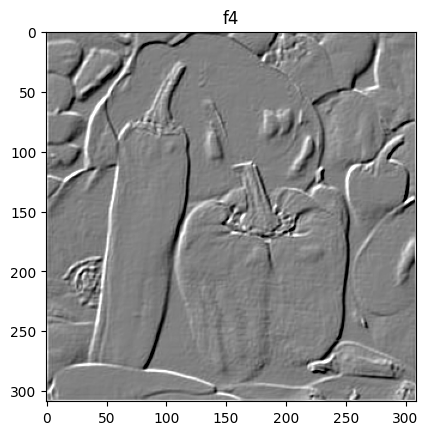

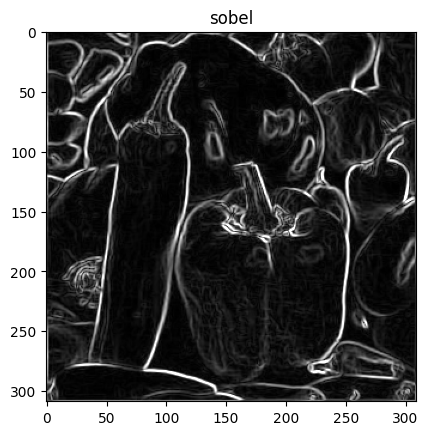

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

img = io.imread('peppers.png')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

plt.figure(), plt.imshow(img, cmap = 'gray')

h, w = img.shape
 
c = 1 # for Prewitt kernels
# c = 2 # for Sobel kernels
# c = np.sqrt(2) # for intrinsic kernels

mask_f1 = [[1, c, 1], [0, 0, 0], [-1, -c, -1]]
mask_f2 = [[0, 1, c], [-1, 0, 1], [-c, -1, 0]]
mask_f3 = [[-1, 0, 1], [-c, 0, c], [-1, 0, 1]]
mask_f4 = [[-c, -1, 0], [-1, 0, 1], [0, 1, c]]

img_f1 = img.copy()
img_f2 = img.copy()
img_f3 = img.copy()
img_f4 = img.copy()
img_sobel = img.copy()

w_size = 3
border = w_size // 2
for i in range(border, h - border):
    for j in range(border, w - border):
        V = img[i - border:i + border + 1, j - border:j + border + 1]
        V_f1 = V * mask_f1
        V_f2 = V * mask_f2
        V_f3 = V * mask_f3
        V_f4 = V * mask_f4
        
        img_f1[i, j] = np.sum(V_f1)
        img_f2[i, j] = np.sum(V_f2)
        img_f3[i, j] = np.sum(V_f3)
        img_f4[i, j] = np.sum(V_f4)
        img_sobel[i, j] = np.max([abs(img_f1[i, j]), abs(img_f2[i, j]), abs(img_f3[i, j]), abs(img_f4[i, j])])
        
plt.figure(), plt.imshow(img_f1, cmap = 'gray', vmin = -255, vmax = 255), plt.title('f1')
plt.figure(), plt.imshow(img_f2, cmap = 'gray', vmin = -255, vmax = 255), plt.title('f2')
plt.figure(), plt.imshow(img_f3, cmap = 'gray', vmin = -255, vmax = 255), plt.title('f3')
plt.figure(), plt.imshow(img_f4, cmap = 'gray', vmin = -255, vmax = 255), plt.title('f4')
plt.figure(), plt.imshow(img_sobel, cmap = 'gray', vmin = 0, vmax = 255 * 1.44), plt.title('sobel')

### Exercise 4. Add noise to an image. Test the different methods and compare the results.
To add noise use:
```python
from skimage import io,color,util

...
img = io.imread(...)
img = color.rgb2gray(img)

img_noise = util.random_noise(img,mode='gaussian',mean=0,var=0.001)
img_noise = img_noise*255
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util
import math

img = io.imread('peppers.png')
img = color.rgb2gray(img)
img = (img * 255).astype(int)

img_n = util.random_noise(img, mode = 'gaussian', mean = 0, var = 0.01)
img_n = (img_n * 255).astype(int)

plt.figure()
plt.imshow(img, cmap = 'gray')

plt.figure()
plt.imshow(img_n, cmap = 'gray')

mask_x = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
mask_y = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]])

img_fx = img_n.copy()
img_fy = img_n.copy()
img_fgrad = img_n.copy()

w, h = img.shape

w_size = 3
border = w_size // 2

for i in range (border, h - border):
    for j in range(border, w - border):
        V = img_n[i - border:i + border + 1, j - border:j + border + 1]
        V_x = V * mask_x
        V_y = V * mask_y
        img_fx[i, j] = np.sum(V_x)
        img_fy[i, j] = np.sum(V_y)
        img_fgrad[i, j] = math.sqrt(img_fx[i, j] ** 2 + img_fy[i, j] ** 2)
        
plt.figure()
plt.imshow(img_fx, cmap = 'gray', vmin = -255, vmax = 255)

plt.figure()
plt.imshow(img_fy, cmap = 'gray', vmin = -255, vmax = 255)

plt.figure()
plt.imshow(img_fgrad, cmap = 'gray', vmin = 0, vmax = 255 * 1.44)

h, w = img.shape   

mask_d1 = np.array([[0, 0, 0], [-1, 0, 1], [0, 0, 0]])
mask_d2 = np.array([[-1, 0, 0], [0, 0, 0], [0, 0, 1]])
mask_d3 = np.array([[0, -1, 0], [0, 0, 0], [0, 1, 0]])
mask_d4 = np.array([[0, 0, -1], [0, 0, 0], [1, 0, 0]])

img_d1 = img_n.copy()
img_d2 = img_n.copy()
img_d3 = img_n.copy()
img_d4 = img_n.copy()
img_fcomp = img_n.copy()

for i in range (border, h - border):
    for j in range(border, w - border):
        V = img_n[i - border:i + border + 1, j - border:j + border + 1]
        D1 = V * mask_d1
        D2 = V * mask_d2
        D3 = V * mask_d3
        D4 = V * mask_d4
        
        img_d1[i, j] = (np.sum(D1))
        img_d2[i, j] = (np.sum(D2))
        img_d3[i, j] = (np.sum(D3))
        img_d4[i, j] = (np.sum(D4))
        
        img_fcomp[i, j] = max(np.abs(img_d1[i, j]), np.abs(img_d2[i, j]), np.abs(img_d3[i, j]), np.abs(img_d4[i, j]))

plt.figure()
plt.imshow(img_d1, cmap = 'gray', vmin = -255, vmax = 255)       

plt.figure()
plt.imshow(img_d2, cmap = 'gray', vmin = -255, vmax = 255)    

plt.figure()
plt.imshow(img_d3, cmap = 'gray', vmin = -255, vmax = 255)    

plt.figure()
plt.imshow(img_d4, cmap = 'gray', vmin = -255, vmax = 255)     
        
plt.figure()
plt.imshow(img_fcomp, cmap = 'gray', vmin = 0, vmax = 255) 

img_f1 = img_n.copy()
img_f2 = img_n.copy()
img_f3 = img_n.copy()
img_f4 = img_n.copy()
img_fsobel = img_n.copy()

for c in [1, 2, math.sqrt(2)]:
    for i in range (border, h - border):
        for j in range(border, w - border):
            mask_f1 = np.array([[1, c, 1], [0, 0, 0], [-1, -c, -1]])
            mask_f2 = np.array([[0, 1, c], [-1, 0, 1], [-c, -1, 0]])
            mask_f3 = np.array([[-1, 0, 1], [-c, 0, c], [-1, 0, 1]])
            mask_f4 = np.array([[-c, -1, 0], [-1, 0, 1], [0, 1, c]])
     
            V = img_n[i - border:i + border + 1, j - border:j + border + 1]
            F1 = V * mask_f1
            F2 = V * mask_f2
            F3 = V * mask_f3
            F4 = V * mask_f4
            
            img_f1[i, j] = (np.sum(F1))
            img_f2[i, j] = (np.sum(F2))
            img_f3[i, j] = (np.sum(F3))
            img_f4[i, j] = (np.sum(F4))
            
            img_fsobel[i, j] = max(np.abs(img_f1[i, j]), np.abs(img_f2[i, j]), np.abs(img_f3[i, j]), np.abs(img_f4[i, j]))

    plt.figure()
    plt.imshow(img_f1, cmap = 'gray', vmin = -255, vmax = 255)       

    plt.figure()
    plt.imshow(img_f2, cmap = 'gray', vmin = -255, vmax = 255)    

    plt.figure()
    plt.imshow(img_f3, cmap = 'gray', vmin = -255, vmax = 255)    

    plt.figure()
    plt.imshow(img_f4, cmap = 'gray', vmin = -255, vmax = 255)     
            
    plt.figure()
    plt.imshow(img_fsobel, cmap = 'gray', vmin = 0, vmax = 255)
